In [1]:
import numpy as np
import math

from matplotlib import pyplot as plt
from matplotlib import animation, rcParams
from tqdm.notebook import tqdm

from IPython.display import clear_output, HTML

rcParams['font.family'] = 'sans-serif'
rcParams['savefig.bbox'] = 'tight'

In [2]:
x0, x1 = 0, 1
y0, y1 = 0, 1

In [3]:
Nx, Ny = 32, 32

Nx_full = Nx + 6
Ny_full = Ny + 6

In [4]:
v_inf = 1
L = 1
Re_inf = 1
nu = Re_inf / (v_inf * L)

In [5]:
h_x = (x1 - x0) / (Nx_full + 1)
h_y = (y1 - y0) / (Ny_full + 1)
x_borders = np.linspace(x0 - 3 * h_x, x1 + 3 * h_x, Nx_full + 1)
y_borders = np.linspace(y0 - 3 * h_x, y1 + 3 * h_x, Ny_full + 1)

In [6]:
x_cells = (x_borders[:-1] + x_borders[1:]) / 2
y_cells = (y_borders[:-1] + y_borders[1:]) / 2

In [7]:
u = np.zeros((x_borders.shape[0], y_cells.shape[0]))
v = np.zeros((x_cells.shape[0], y_borders.shape[0]))
P = np.zeros((x_cells.shape[0], y_cells.shape[0]))

In [8]:
h_x = x_borders[1] - x_borders[0]
h_y = y_borders[1] - y_borders[0]

In [9]:
tau = 0.0001
t0, T = 0, 1
nt = int(math.ceil((T - t0)/tau))
t = np.linspace(t0, T, nt + 1)

In [10]:
P[15,15] = 0.1
P[14,15] = 0.1
P[16,15] = 0.1
P[15,14] = 0.1
P[15,16] = 0.1

In [11]:
for _ in tqdm(range(nt)):
    u_ppp_p, u_pp__p, u_p___p, u_m___p, u_mm__p, u_mmm_p = u[5:,3:-1], u[4:-1,3:-1], u[3:-2,3:-1], u[2:-3,3:-1], u[1:-4,3:-1], u[:-5,3:-1]
    u_ppp_0, u_pp__0, u_p___0, u_m___0, u_mm__0, u_mmm_0 = u[5:,2:-2], u[4:-1,2:-2], u[3:-2,2:-2], u[2:-3,2:-2], u[1:-4,2:-2], u[:-5,2:-2]
    u_ppp_m, u_pp__m, u_p___m, u_m___m, u_mm__m, u_mmm_m = u[5:,1:-3], u[4:-1,1:-3], u[3:-2,1:-3], u[2:-3,1:-3], u[1:-4,1:-3], u[:-5,1:-3]

    v_p_pp_, v_0_pp_, v_m_pp_ = v[3:-1,5:],   v[2:-2,5:],   v[1:-3,5:]
    v_p_pp_, v_0_pp_, v_m_pp_ = v[3:-1,4:-1], v[2:-2,4:-1], v[1:-3,4:-1]
    v_p_p__, v_0_p__, v_m_p__ = v[3:-1,3:-2], v[2:-2,3:-2], v[1:-3,3:-2]
    v_p_m__, v_0_m__, v_m_m__ = v[3:-1,2:-3], v[2:-2,2:-3], v[1:-3,2:-3]
    v_p_mm_, v_0_mm_, v_m_mm_ = v[3:-1,1:-4], v[2:-2,1:-4], v[1:-3,1:-4]
    v_p_mm_, v_0_mm_, v_m_mm_ = v[3:-1,:-5],  v[2:-2,:-5],  v[1:-3,:-5]
    
    P_0_0, P_p_0, P_m_0, P_0_p, P_0_m = P[2:-2,2:-2], P[3:-1,2:-2], P[1:-3,2:-2], P[2:-2,3:-1], P[2:-2,1:-3]


    DU2, DU4 = 0, 0, 0, 0
    
    u_wave_p_0 = 0.5 * (u_pp__0 - u_p___0)
    delta_u_wave_p_0 = u_pp__0 - u_p___0
    delta_2_u_wave_p_0 = 0.5 * (u_ppp_0 - u_pp__0 - u_p___0 + u_m___0)
    cu_p_0 = tau * np.abs(u_wave_p_0) / h_x
    A = np.where(
        u_wave_p_0 >= 0,
        0.5 * (3 - cu_p_0) * u_p___0 - 0.5 * (1 - cu_p_0) * u_m___0,
        0.5 * (3 - cu_p_0) * u_pp__0 - 0.5 * (1 - cu_p_0) * u_ppp_0,
    )
    B = 0.5 * (1 - (tau * u_wave_p_0) / h_x) * u_pp__0 + 0.5 * (1 + (tau * u_wave_p_0) / h_x) * u_p___0
    DU3 = u_wave_p_0 * np.where(u_wave_p_0 * delta_u_wave_p_0 * delta_2_u_wave_p_0 >= 0, A, B)
    
    u_wave_0_0 = 0.5 * (u_p___0 - u_m___0)
    delta_u_wave_0_0 = u_p___0 - u_m___0
    delta_2_u_wave_0_0 = 0.5 * (u_pp__0 - u_p___0 - u_m___0 + u_mm__0)
    cu_0_0 = tau * np.abs(u_wave_0_0) / h_x
    A = np.where(
        u_wave_0_0 >= 0,
        0.5 * (3 - cu_0_0) * u_m___0 - 0.5 * (1 - cu_0_0) * u_mm__0,
        0.5 * (3 - cu_0_0) * u_p___0 - 0.5 * (1 - cu_0_0) * u_pp__0,
    )
    B = 0.5 * (1 - (tau * u_wave_0_0) / h_x) * u_p___0 + 0.5 * (1 + (tau * u_wave_0_0) / h_x) * u_m___0
    DU1 = u_wave_0_0 * np.where(u_wave_0_0 * delta_u_wave_0_0 * delta_2_u_wave_0_0 >= 0, A, B)
    
    
    
    
    A = (DU3 - DU1) / h_x + (DU4 - DU2) / h_y
    B = (v_p_p__ - v_0_p__) / h_x - (u_p___p - u_p___0) / h_y
    C = (v_p_m__ - v_0_m__) / h_x - (u_p___0 - u_p___m) / h_y
    u_wave = u_p___0 + tau * (A - nu / h_y * (B - C))
    
    DV1, DV2, DV3, DV4 = 0, 0, 0, 0
    
    A = (DV3 - DV1) / h_x + (DV4 - DV2) / h_y
    B = (v_p_p__ - v_0_p__) / h_x - (u_p___p - u_p___0) / h_y
    C = (v_0_p__ - v_m_p__) / h_x - (u_m___p - u_m___0) / h_y
    v_wave = v_0_p__ + tau * (A + nu / h_x * (B - C))

    P[2:-2,2:-2] = 0.25 * (P_p_0 + P_m_0 + P_0_p + P_0_m) #(h_y**2 * (P_p_0 + P_m_0) + h_x**2 * (P_0_p + P_0_m)) / (2 * (h_x ** 2 + h_y ** 2))

    P_0_0, P_p_0, P_m_0, P_0_p, P_0_m = P[2:-2,2:-2], P[3:-1,2:-2], P[1:-3,2:-2], P[2:-2,3:-1], P[2:-2,1:-3]
    
    u[3:-2,2:-2] = u_wave - tau / h_x * (P_p_0 - P_0_0)
    v[2:-2,3:-2] = v_wave - tau / h_y * (P_0_p - P_0_0)

  0%|          | 0/10000 [00:00<?, ?it/s]

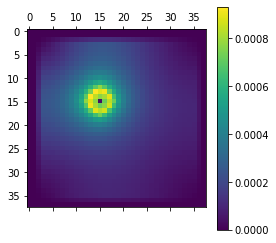

In [12]:
plt.matshow(np.sqrt((u[1:] + u[:-1])**2 + (v[:,1:] + v[:,:-1])**2))
plt.colorbar()

array([[ 4.08906287e-21,  6.91251972e-11,  1.38240341e-10, ...,
         1.23246110e-10,  5.38836537e-11,  1.33370459e-11],
       [-3.20610025e-22, -2.22581912e-14,  8.05818065e-14, ...,
        -1.83501325e-12, -8.10055612e-13, -2.01265452e-13],
       [-2.89887056e-22, -7.56966550e-14, -7.12476612e-15, ...,
        -2.35938657e-12, -1.04817544e-12, -2.61874949e-13],
       ...,
       [ 6.05171727e-23, -4.05941573e-13, -1.62720214e-12, ...,
        -2.65449016e-16,  1.23644923e-14,  4.95736541e-15],
       [ 3.79066610e-23, -2.66565499e-13, -1.06690300e-12, ...,
        -1.89158564e-14, -8.00033617e-17,  1.22750901e-15],
       [ 1.80892138e-23, -1.32614291e-13, -5.30353608e-13, ...,
        -1.50661154e-14, -2.53628676e-15, -1.01277817e-17]])

TypeError: Invalid shape () for image data

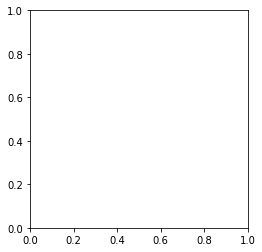

In [18]:
plt.imshow(DV1)
plt.xlabel('x')

In [20]:
(u[1:] + u[:-1]).shape

(38, 38)

In [21]:
x_cells.shape

(38,)

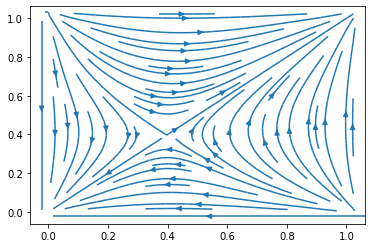

In [31]:
plt.streamplot(x_cells, y_cells, 0.5*(u[1:] + u[:-1]), 0.5*(v[:,1:] + v[:,:-1]))

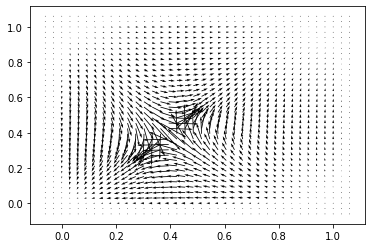

In [39]:
plt.x
plt.quiver(x_cells, y_cells, 0.5*(u[:-1] + u[1:]), 0.5*(v[:,1:] + v[:,:-1])) 

  0%|          | 0/20 [00:00<?, ?it/s]

<ipython-input-197-3f0f6517e88a>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


<Figure size 432x288 with 0 Axes>

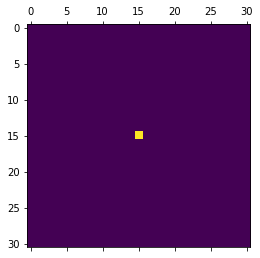

<Figure size 432x288 with 0 Axes>

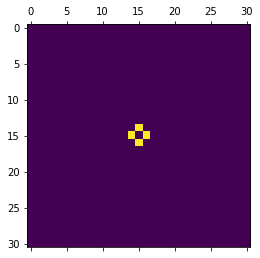

<Figure size 432x288 with 0 Axes>

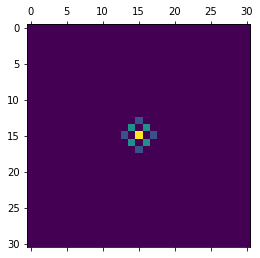

<Figure size 432x288 with 0 Axes>

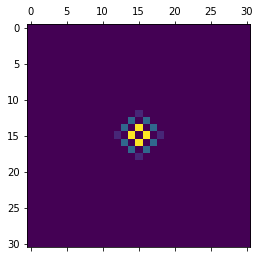

<Figure size 432x288 with 0 Axes>

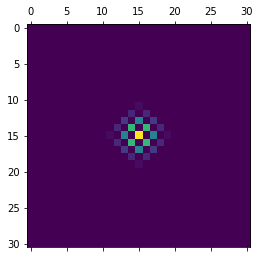

<Figure size 432x288 with 0 Axes>

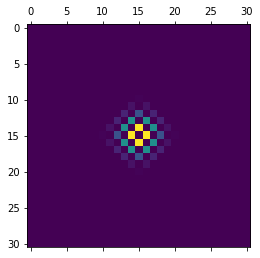

<Figure size 432x288 with 0 Axes>

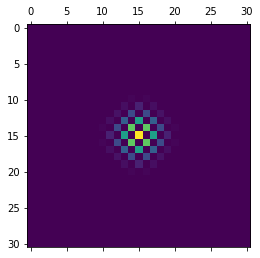

<Figure size 432x288 with 0 Axes>

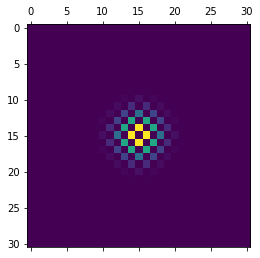

<Figure size 432x288 with 0 Axes>

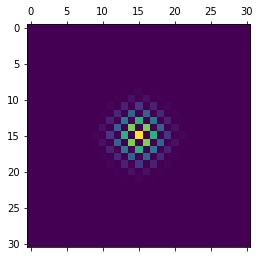

<Figure size 432x288 with 0 Axes>

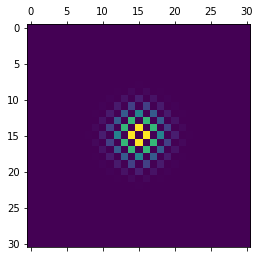

<Figure size 432x288 with 0 Axes>

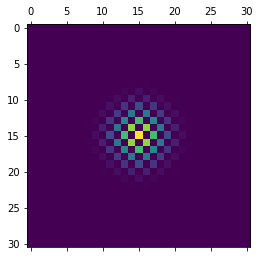

<Figure size 432x288 with 0 Axes>

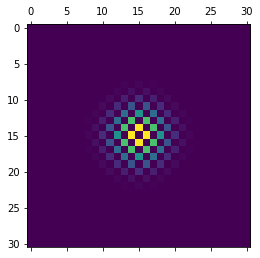

<Figure size 432x288 with 0 Axes>

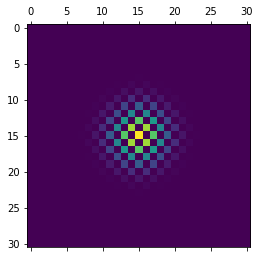

<Figure size 432x288 with 0 Axes>

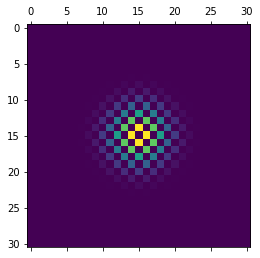

<Figure size 432x288 with 0 Axes>

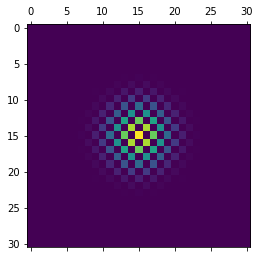

<Figure size 432x288 with 0 Axes>

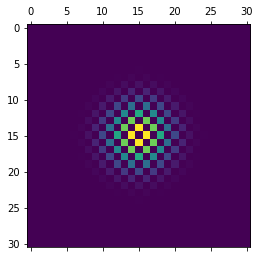

<Figure size 432x288 with 0 Axes>

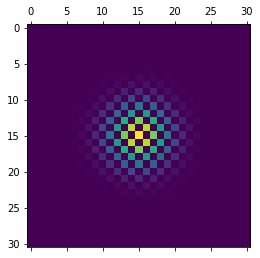

<Figure size 432x288 with 0 Axes>

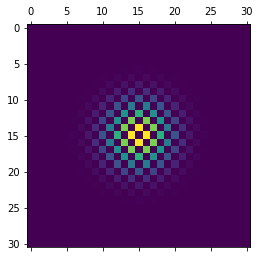

<Figure size 432x288 with 0 Axes>

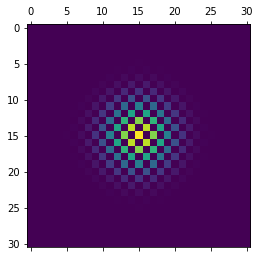

<Figure size 432x288 with 0 Axes>

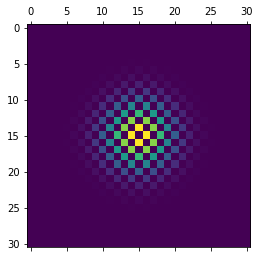

<Figure size 432x288 with 0 Axes>

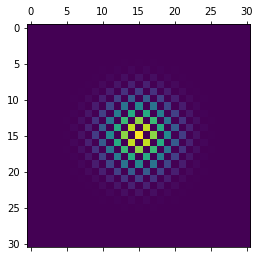

In [197]:
P = np.zeros((31, 31))
P[15, 15] = 100
for _ in tqdm(range(20)):
    plt.figure()
    plt.matshow(P)
    P[1:-1, 1:-1] = 0.25 * (P[1:-1, 2:] + P[1:-1, :-2] + P[2:, 1:-1] + P[:-2,1:-1])
plt.figure()
plt.matshow(P)

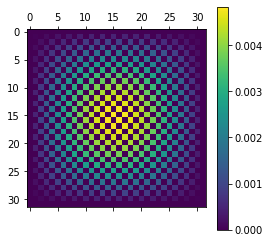